In [1]:
# Import the modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
HR_data_df = pd.read_csv('Resources/HR_Employee_Attrition.csv')

# Review the DataFrame
HR_data_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Check column names
HR_data_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
# Check column datatypes
HR_data_df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [5]:
# Check null values
HR_data_df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<Axes: xlabel='Attrition', ylabel='count'>

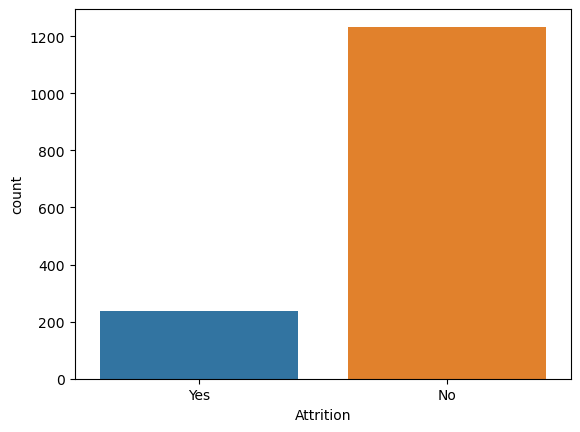

In [6]:
# Count distribution of attrition values
sns.countplot(x='Attrition', data=HR_data_df)

In [7]:
#Drop columns that is not important feature
HR_data_df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

#Convert attrition column from categorical to numeric
categorical_col = []
for column in HR_data_df.columns:
    if HR_data_df[column].dtype == object and len(HR_data_df[column].unique()) <= 50:
        categorical_col.append(column)
        
HR_data_df['Attrition'] = HR_data_df.Attrition.astype("category").cat.codes

In [8]:
# Attrition columns is convert from yes/no to 1/0
HR_data_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [9]:
categorical_col.remove('Attrition')

In [10]:
# Transform categorical data into dummies
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for column in categorical_col:
    HR_data_df[column] = label.fit_transform(HR_data_df[column])

In [11]:
HR_data_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


In [12]:
# Train test split
from sklearn.model_selection import train_test_split

X = HR_data_df.drop('Attrition', axis=1)
y = HR_data_df.Attrition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
# Define and print report for accuracy score, confusion matrix and classification report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

## Perform 3 model for comparison

In [15]:
# Perform Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)

Test Result:
Accuracy Score: 77.78%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.887363   0.259740  0.777778    0.573551      0.800549
recall       0.850000   0.327869  0.777778    0.588934      0.777778
f1-score     0.868280   0.289855  0.777778    0.579067      0.788271
support    380.000000  61.000000  0.777778  441.000000    441.000000
_______________________________________________
Confusion Matrix: 
 [[323  57]
 [ 41  20]]

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    853.0  176.0       1.0     1029.0        1029.0
_______________________________________________
Conf

In [16]:
# Print Decision Tree Diagram
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(HR_data_df.columns)
features.remove("Attrition")

In [18]:
# Print Decision Tree Diagram
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

FileNotFoundError: [WinError 2] "dot" not found in path.

In [19]:
# Perform Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)

Test Result:
Accuracy Score: 86.39%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.870370   0.555556  0.863946    0.712963      0.826825
recall       0.989474   0.081967  0.863946    0.535720      0.863946
f1-score     0.926108   0.142857  0.863946    0.534483      0.817768
support    380.000000  61.000000  0.863946  441.000000    441.000000
_______________________________________________
Confusion Matrix: 
 [[376   4]
 [ 56   5]]

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    853.0  176.0       1.0     1029.0        1029.0
_______________________________________________
Conf

In [20]:
# Perform Logistic Regression 
from sklearn.linear_model import LogisticRegression

logres_clf = LogisticRegression(random_state=0, C=1000,max_iter=10000)
logres_clf.fit(X_train, y_train)

print_score(logres_clf, X_train, y_train, X_test, y_test, train=False)
print_score(logres_clf, X_train, y_train, X_test, y_test, train=True)

Test Result:
Accuracy Score: 86.39%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.886473   0.518519  0.863946    0.702496      0.835577
recall       0.965789   0.229508  0.863946    0.597649      0.863946
f1-score     0.924433   0.318182  0.863946    0.621308      0.840575
support    380.000000  61.000000  0.863946  441.000000    441.000000
_______________________________________________
Confusion Matrix: 
 [[367  13]
 [ 47  14]]

Train Result:
Accuracy Score: 87.07%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.887097    0.717172  0.870748     0.802134      0.858033
recall       0.967175    0.403409  0.870748     0.685292      0.870748
f1-score     0.925407    0.516364  0.870748     0.720885      0.855444
support    853.000000  176.000000  0.870748  1029.000000   1029.

## Perform feature importance to determine the top 10 features that heavily influence each model

In [21]:
# Decision Tree in sklearn will automatically calculate feature importance
importances_tree = tree_clf.feature_importances_
# We can sort the features by their importance
sorted(zip(tree_clf.feature_importances_, X.columns), reverse=True)

[(0.11103468547296066, 'MonthlyIncome'),
 (0.08722849695650017, 'Age'),
 (0.07469007017615847, 'OverTime'),
 (0.07118262608544246, 'DailyRate'),
 (0.06274139342614768, 'TrainingTimesLastYear'),
 (0.05686759516844843, 'HourlyRate'),
 (0.04967502732640931, 'DistanceFromHome'),
 (0.04932089610352957, 'TotalWorkingYears'),
 (0.04928119094437205, 'NumCompaniesWorked'),
 (0.03992932766649921, 'YearsSinceLastPromotion'),
 (0.03631256151516291, 'MonthlyRate'),
 (0.03303619967280767, 'YearsInCurrentRole'),
 (0.03264717182201232, 'YearsAtCompany'),
 (0.02999333944588968, 'MaritalStatus'),
 (0.029531647699845148, 'Education'),
 (0.028566729800705355, 'EducationField'),
 (0.027089225421629306, 'PercentSalaryHike'),
 (0.025227416250385774, 'JobRole'),
 (0.017840665773339107, 'RelationshipSatisfaction'),
 (0.015848889576685794, 'YearsWithCurrManager'),
 (0.01566663114142598, 'EnvironmentSatisfaction'),
 (0.012739520833126915, 'JobSatisfaction'),
 (0.012713783046001455, 'StockOptionLevel'),
 (0.01249

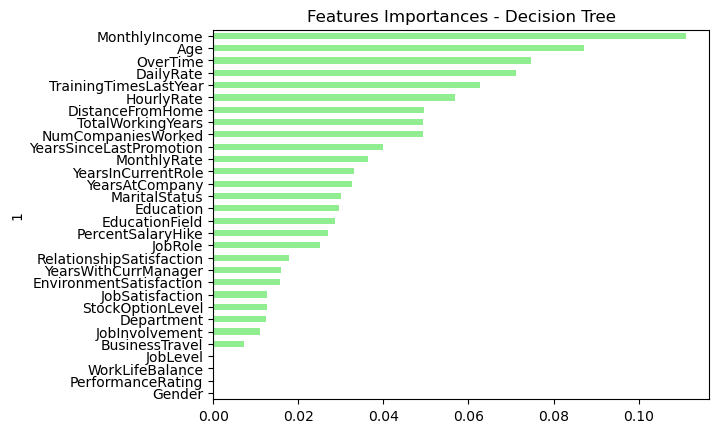

In [22]:
# Visualize the features by importance - Decision Trees
importances_tree_df = pd.DataFrame(sorted(zip(tree_clf.feature_importances_, X.columns), reverse=True))
importances_tree_df.set_index(importances_tree_df[1], inplace=True)
importances_tree_df.drop(columns=1, inplace=True)
importances_tree_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_tree_sorted = importances_tree_df.sort_values(by='Feature Importances')
importances_tree_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances - Decision Tree', legend=False)

plt.savefig('Images/feature_importance_trees.png')

In [23]:
# Random Forest in sklearn will automatically calculate feature importance
importances_rf = rf_clf.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_clf.feature_importances_, X.columns), reverse=True)

[(0.08161963578342521, 'MonthlyIncome'),
 (0.06423116410000312, 'Age'),
 (0.058196321743888176, 'TotalWorkingYears'),
 (0.05497268698606638, 'OverTime'),
 (0.05134441171509614, 'DailyRate'),
 (0.04846189203997785, 'DistanceFromHome'),
 (0.045571444028124984, 'MonthlyRate'),
 (0.04532171317544492, 'YearsAtCompany'),
 (0.04507162440849511, 'HourlyRate'),
 (0.03651571104813764, 'NumCompaniesWorked'),
 (0.0359177534567049, 'StockOptionLevel'),
 (0.034788085472544895, 'PercentSalaryHike'),
 (0.03105409943140636, 'YearsWithCurrManager'),
 (0.030522434125489713, 'YearsInCurrentRole'),
 (0.028950669078626597, 'JobRole'),
 (0.028841774265916286, 'MaritalStatus'),
 (0.02760218855320852, 'EnvironmentSatisfaction'),
 (0.027447607867366795, 'TrainingTimesLastYear'),
 (0.02706253987217371, 'JobSatisfaction'),
 (0.02701916581347311, 'YearsSinceLastPromotion'),
 (0.026143413473026365, 'JobLevel'),
 (0.023541246532251692, 'EducationField'),
 (0.02121160129980395, 'RelationshipSatisfaction'),
 (0.020649

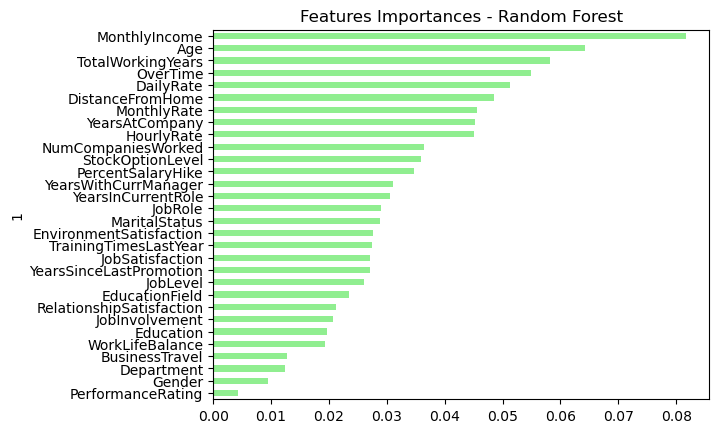

In [24]:
# Visualize the features by importance - Random Forest
importances_rf_df = pd.DataFrame(sorted(zip(rf_clf.feature_importances_, X.columns), reverse=True))
importances_rf_df.set_index(importances_rf_df[1], inplace=True)
importances_rf_df.drop(columns=1, inplace=True)
importances_rf_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_rf_sorted = importances_rf_df.sort_values(by='Feature Importances')
importances_rf_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances - Random Forest', legend=False)

plt.savefig('Images/feature_importance_rf.png')

In [25]:
# Logistic Regression in sklearn will automatically calculate feature importance
importances_logres = logres_clf.coef_[0]
# We can sort the features by their importance
sorted(zip(logres_clf.coef_[0], X.columns), reverse=True)

[(1.7561326878505203, 'OverTime'),
 (0.8266137803857814, 'MaritalStatus'),
 (0.37307614440531833, 'Gender'),
 (0.3163193417293651, 'Department'),
 (0.23842185176947772, 'BusinessTravel'),
 (0.22458751632712742, 'NumCompaniesWorked'),
 (0.15746379668098925, 'Education'),
 (0.1348278276641566, 'YearsSinceLastPromotion'),
 (0.12920350020345406, 'PerformanceRating'),
 (0.128406768726581, 'YearsAtCompany'),
 (0.1259877408044547, 'EducationField'),
 (0.033867743581042324, 'DistanceFromHome'),
 (0.01691815271352328, 'JobLevel'),
 (0.009477717950411548, 'JobRole'),
 (1.0014427585444935e-05, 'MonthlyRate'),
 (-7.620732023050556e-05, 'MonthlyIncome'),
 (-8.245372864054702e-05, 'DailyRate'),
 (-0.0005239383453080795, 'HourlyRate'),
 (-0.02322234255720883, 'PercentSalaryHike'),
 (-0.02713503502228267, 'Age'),
 (-0.0772174441746197, 'TrainingTimesLastYear'),
 (-0.08793921364542567, 'YearsWithCurrManager'),
 (-0.09410587084347039, 'TotalWorkingYears'),
 (-0.10680566128158256, 'StockOptionLevel'),
 (

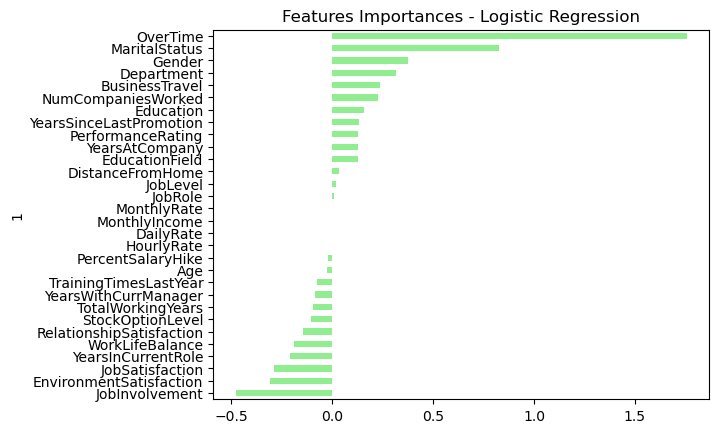

In [26]:
# Visualize the features by importance - Logistic Regression
importances_logres_df = pd.DataFrame(sorted(zip(logres_clf.coef_[0], X.columns), reverse=True))
importances_logres_df.set_index(importances_logres_df[1], inplace=True)
importances_logres_df.drop(columns=1, inplace=True)
importances_logres_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_rf_sorted = importances_logres_df.sort_values(by='Feature Importances')
importances_rf_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances - Logistic Regression', legend=False)

plt.savefig('Images/feature_importance_logres.png')

In [27]:
# Logistic Regression (absolute value) in sklearn will automatically calculate feature importance
importances_logres_abs = abs(logres_clf.coef_[0])
# We can sort the features by their importance
sorted(zip(abs(logres_clf.coef_[0]), X.columns), reverse=True)

[(1.7561326878505203, 'OverTime'),
 (0.8266137803857814, 'MaritalStatus'),
 (0.47855745139721184, 'JobInvolvement'),
 (0.37307614440531833, 'Gender'),
 (0.3163193417293651, 'Department'),
 (0.31003448197273653, 'EnvironmentSatisfaction'),
 (0.2876471105039951, 'JobSatisfaction'),
 (0.23842185176947772, 'BusinessTravel'),
 (0.22458751632712742, 'NumCompaniesWorked'),
 (0.20868109389640002, 'YearsInCurrentRole'),
 (0.19168933394651125, 'WorkLifeBalance'),
 (0.15746379668098925, 'Education'),
 (0.14525788759449704, 'RelationshipSatisfaction'),
 (0.1348278276641566, 'YearsSinceLastPromotion'),
 (0.12920350020345406, 'PerformanceRating'),
 (0.128406768726581, 'YearsAtCompany'),
 (0.1259877408044547, 'EducationField'),
 (0.10680566128158256, 'StockOptionLevel'),
 (0.09410587084347039, 'TotalWorkingYears'),
 (0.08793921364542567, 'YearsWithCurrManager'),
 (0.0772174441746197, 'TrainingTimesLastYear'),
 (0.033867743581042324, 'DistanceFromHome'),
 (0.02713503502228267, 'Age'),
 (0.023222342557

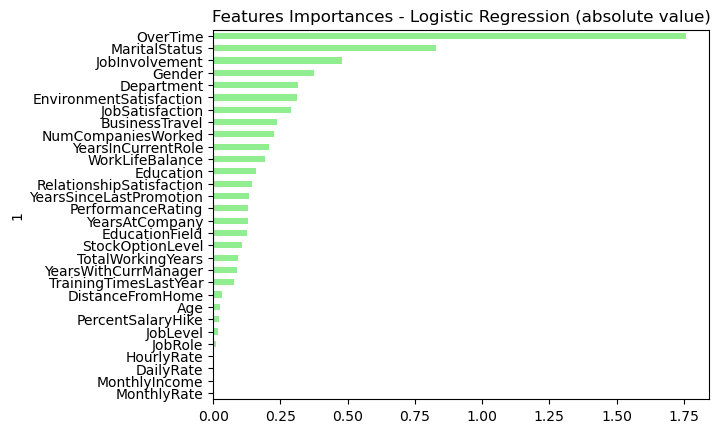

In [28]:
# Visualize the features by importance - Logistic Regression (absolute value)
importances_logres_abs_df = pd.DataFrame(sorted(zip(abs(logres_clf.coef_[0]), X.columns), reverse=True))
importances_logres_abs_df.set_index(importances_logres_abs_df[1], inplace=True)
importances_logres_abs_df.drop(columns=1, inplace=True)
importances_logres_abs_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_rf_sorted = importances_logres_abs_df.sort_values(by='Feature Importances')
importances_rf_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances - Logistic Regression (absolute value)', legend=False)

plt.savefig('Images/feature_importance_logres_abs.png')

## Of the 3 models, both random forest and logistic regression accuracy on the test data is 86%, however, logistic regression accuracy on trained data was 87%, compared to 100% for random forest. As such, random forest will be used to further optimised the model.

## To optimise the model, we now look at the top 10 features for random forest that heavily influence the model. We will now use these 15 features to further optimise the random forest model. 

In [29]:
# combine the feature importance table into one
frames = [importances_tree_df, importances_rf_df, importances_logres_abs_df]

result = pd.concat(frames, axis=1)

In [30]:
# Rename the columns accordingly
result.rename(columns = {'Feature Importances':'Feature Importances - Decision Tree', 
                         'Feature Importances':'Feature Importances - Random Forest', 
                         'Feature Importances':'Feature Importances - Logistic Regression (absolute value)'}, inplace = True)

In [31]:
result.head()

,Feature Importances - Logistic Regression (absolute value),Feature Importances - Logistic Regression (absolute value),Feature Importances - Logistic Regression (absolute value)
1,,,
MonthlyIncome,0.111035,0.081620,0.000076
Age,0.087228,0.064231,0.027135
OverTime,0.074690,0.054973,1.756133
DailyRate,0.071183,0.051344,0.000082
TrainingTimesLastYear,0.062741,0.027448,0.077217


In [32]:
result.to_csv('Output/feature_importance_summary.csv')